In [1]:
#pip install numpy==1.15.0

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from numpy import zeros

#loading image
image = Image.open('sample01.jpg')

#get width and height of image
imgWidth, imgHeight = image.size

#changing image to bytes so as to get pixel intesities
image_to_float = image.tobytes()
pixel_intensities = [image_to_float[i] for i in range(len(image_to_float))]


In [3]:
# To plot cumulative frequency of pixel intensities
img = np.array(pixel_intensities).reshape((imgHeight,imgWidth,3))

hist, bins = np.histogram(img.flatten(),256,[0,256])

In [4]:
#cumulative distribution function
def cumSum(array):
    cumArray = zeros([len(array)])
    cumArray = cumArray.astype(int)
    for i in range(len(array)):
        for j in range(i+1):
            cumArray[i] += array[j]
    return cumArray       

In [5]:
cdf = cumSum(hist)

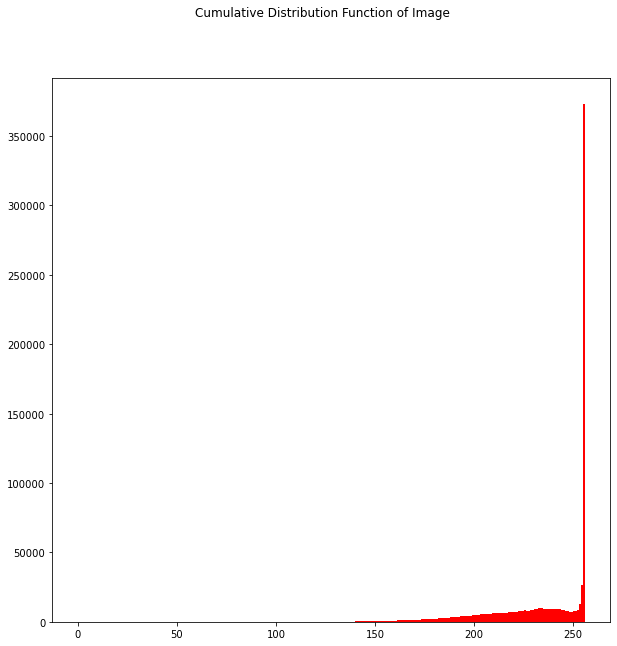

In [6]:
#plot histogram of cdf
fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("Cumulative Distribution Function of Image")
ax.hist(img.flatten(),256,[0,256],color='r')

plt.savefig('Histogram Before.png')
plt.show()

In [7]:
#masking the zeroes in the array
cdfMasked = np.ma.masked_equal(cdf,0)

In [8]:
#Histogram Equalization
histEqu = ((cdfMasked - cdfMasked.min())*255)/(cdfMasked.max() - cdfMasked.min())
histEqu = np.ma.filled(histEqu,0).astype('uint8')
img2 = histEqu[img]

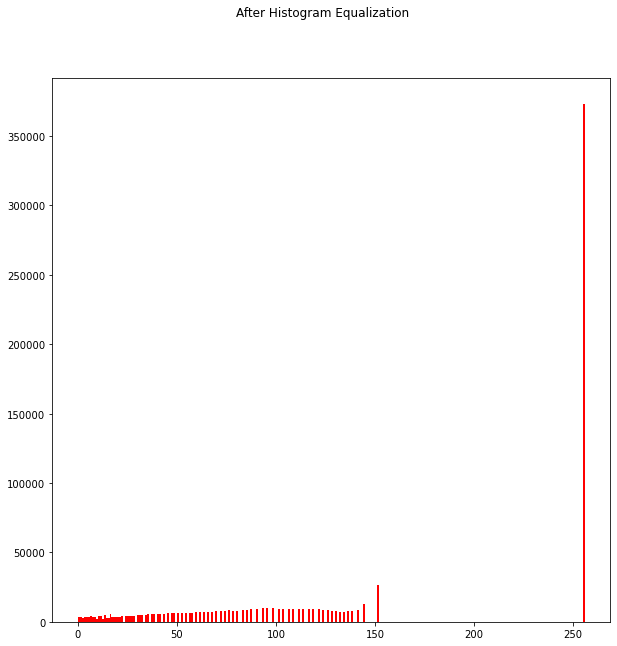

In [9]:
#plot equalized histogram 
fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("After Histogram Equalization")
ax.hist(img2.flatten(),256,[0,256],color='r')

plt.savefig('Histogram After.png')
plt.show()

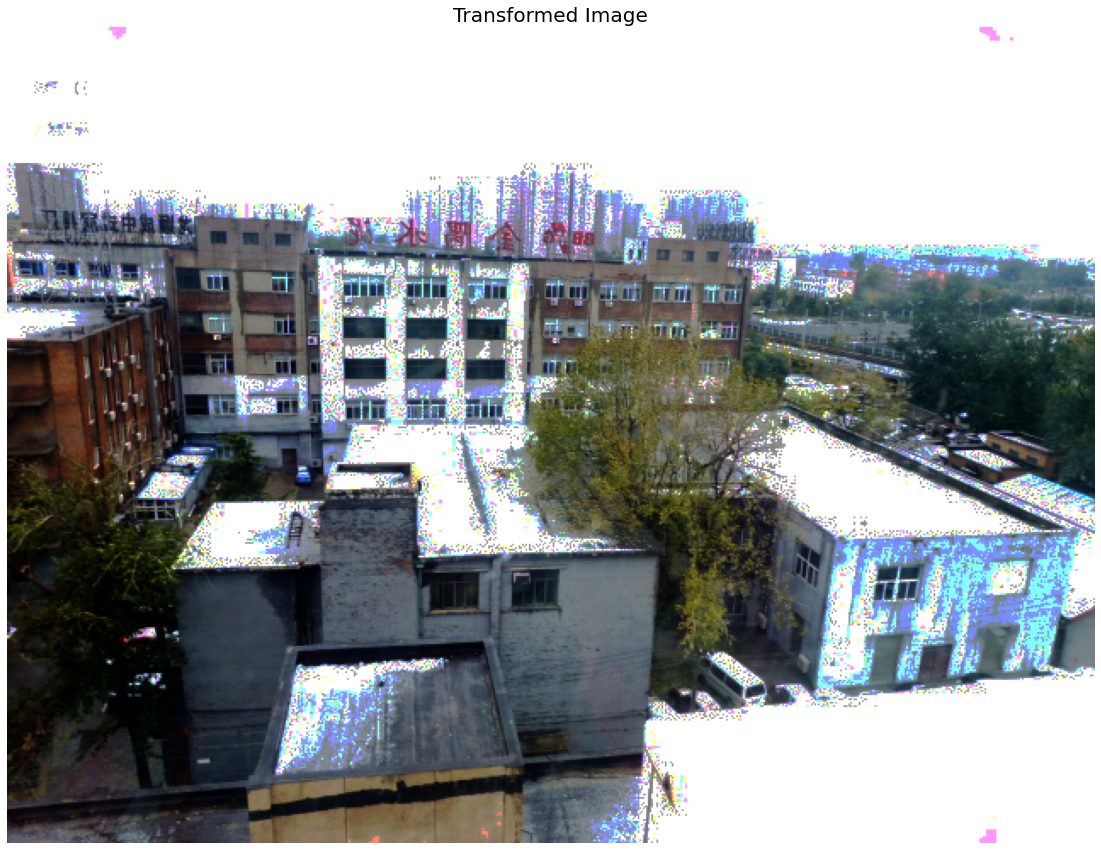

In [10]:
#display equalized image
font_dict = {'fontsize': 20,
             'fontweight' : 20,
             'verticalalignment':'baseline',
             }

fig,axes = plt.subplots(1,1,figsize=(20,15),sharey = True)
axes.imshow(img2.astype('uint8'),cmap = 'gray')
axes.set_axis_off()
axes.set_title("Transformed Image",fontdict = font_dict)

plt.savefig('transformed_image2.png')
plt.show()

In [11]:
#Convert YCbCr to RGB
def ycbcrToRgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    return np.uint8(rgb.dot(xform.T))

In [12]:
#Convert image to YCbCr
ycbcr = image.convert('YCbCr')
ycbcrToFloat = np.ndarray((image.size[1],image.size[0],3),'u1',ycbcr.tobytes())

In [13]:
#transforming the Y 
imgY = ycbcrToFloat[:,:,0]

histY, bins = np.histogram(imgY.flatten(),256,[0,256])

In [14]:
#cumulative distribution function
cdfY = cumSum(histY)

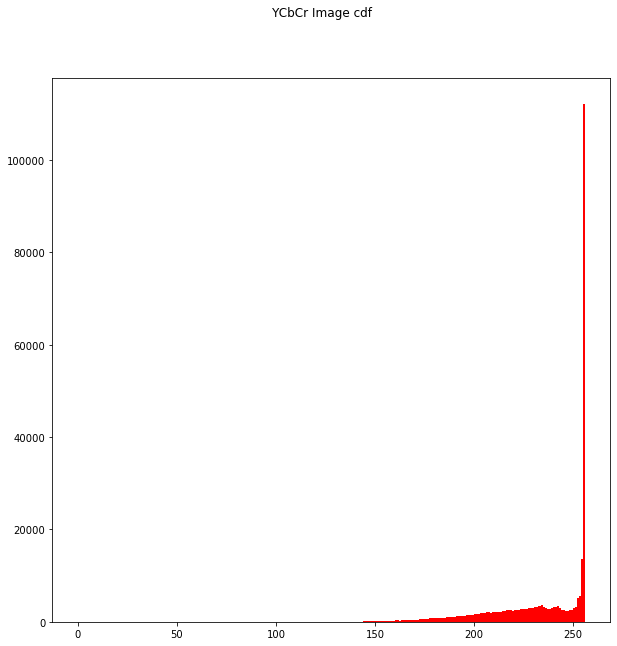

In [15]:
#plotting histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("YCbCr Image cdf")
ax.hist(imgY.flatten(),256,[0,256],color='r')

plt.savefig('Histogram of YCbCr image Before.png')
plt.show()

In [16]:
#Equalizing the Y Component
cdfMaskedY = np.ma.masked_equal(cdfY,0)
cdfMaskedY = ((cdfMaskedY - cdfMaskedY.min())*255)/(cdfMaskedY.max() - cdfMaskedY.min())
cdfScaledY = np.ma.filled(cdfMaskedY,0).astype('uint8')
img3 = cdfScaledY[imgY]

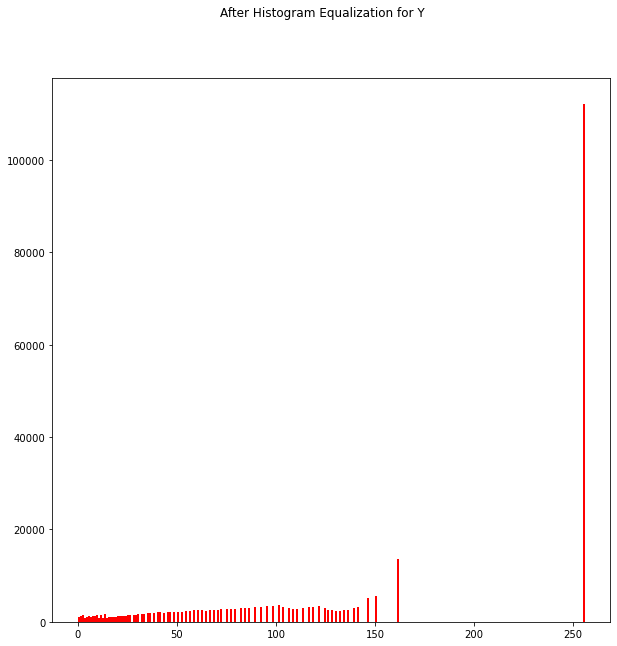

In [17]:
#plotting histogram
fig,ax = plt.subplots(1,1,figsize=(10,10))
fig.suptitle("After Histogram Equalization for Y")
ax.hist(img3.flatten(),256,[0,256],color='r')

plt.savefig('Histogram of YCbCr image After.png')
plt.show()

In [18]:
ycbcrToFloat.setflags(write = 1)

ycbcrTransformed = ycbcrToFloat
ycbcrTransformed[:,:,0] = img3 

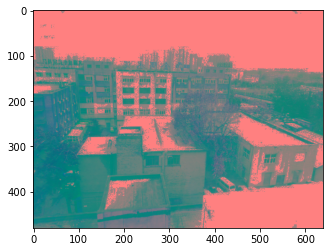

In [19]:
#transformed YCbCr image
plt.imshow(ycbcrTransformed[:,:,:].astype('uint8'),cmap='gray')
plt.savefig("RGB-YCbCr-transformed.png")
plt.show()

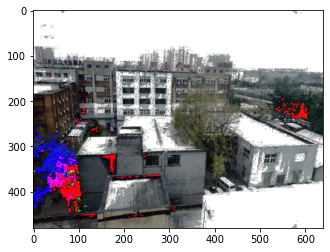

In [20]:
#transforming image back to RGB
RGBTransformed = ycbcrToRgb(ycbcrTransformed)
plt.imshow(RGBTransformed.astype('uint8'),cmap='gray')
plt.savefig('RGB-YCbCr-RGB_transfomed.png')
plt.show()